In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from joblib import dump

In [2]:
#Read in the data
df = pd.read_csv("../Logged-Matrix-Data.csv")
X = df[['Bluetooth-2','Accelerometer-1', 'Accelerometer-2', 'Accelerometer-3', 'Gyroscope-1', 'Gyroscope-2', 'Gyroscope-3']]
df[['Distance']] = df[['Distance']].values > 6
y = df[['Distance']]

#Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Series where metrics are stored
s = pd.Series(index = ["id", "validation score", "auc", "f-measure", "precision", "recall"])

C:\Users\swang\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


C:\Users\swang\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6733385153517296


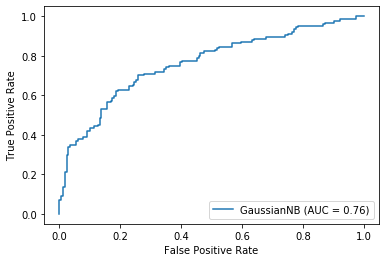

In [3]:
#Call the model
model = GaussianNB()
#Train the model
model.fit(X_train, y_train)
#Test the model
y_hats = model.predict(X_test)
plot_roc_curve(model,X_test, y_test['Distance'])
#Collect and print model metrics
s["validation score"] = roc_auc_score(y_test['Distance'], y_hats)
print(s["validation score"])

0.5068493150684932
0.027027027027027025
1.0
0.0136986301369863


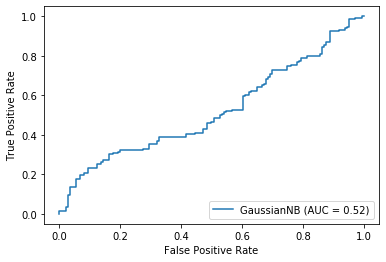

In [4]:
#Set the IDs for the model
model_name = "Naive_Bayes"
dateId = datetime.now().strftime('%m_%d_%Y_%H_%M_%S')
#Read in the pi data for validation
df_test = pd.read_csv("../Pi_Distance_Data.csv")
X_pi = df_test[['RSSI','ax','ay','az','gx','gy','gz']]
df_test[['Distance']] = df_test[['Distance']].values > 6
y_pi = df_test[['Distance']]
y_hats = model.predict(X_pi)
#Collect and print the model metrics
s["auc"] = roc_auc_score(y_pi['Distance'], y_hats)
print(s["auc"])
plot_roc_curve(model,X_pi, y_pi['Distance'])
s["id"] = dateId
s["f-measure"] = f1_score(y_pi['Distance'], y_hats)
print(s["f-measure"])
s["precision"] = precision_score(y_pi['Distance'], y_hats)
print(s["precision"])
s["recall"] = recall_score(y_pi['Distance'], y_hats)
print(s["recall"])
#Append this data to the CSV
pd.DataFrame(s).T.to_csv(model_name+".csv", mode ="a", index=False, header = False)
#Pickle the model
dump(model, "saved/" + model_name+'/' + dateId + "_" + str(s["auc"]) + '.joblib')

0.6617777777777778
0.615050965083496
0.6067989214175654
0.5961119186046512


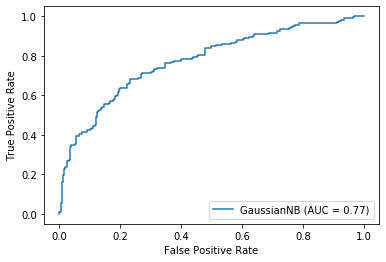

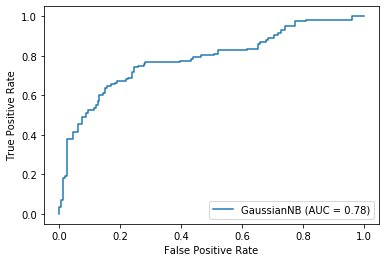

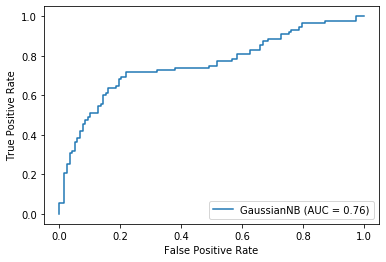

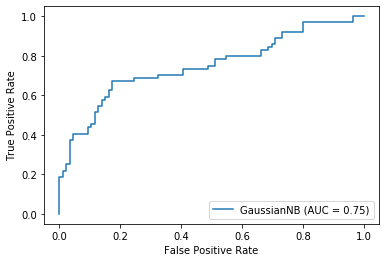

In [5]:
dump(model, "saved/" + model_name+'/' + dateId + "_" + str(s["auc"]) + '.joblib')
sizes = [1,3,5,7,10]
current = 1
for i in sizes:
    if i == current:
        continue
    df = pd.read_csv("../Logged-Matrix-Data"+str(i)+".csv")
    X_test = df[['Bluetooth-2','Accelerometer-1', 'Accelerometer-2', 'Accelerometer-3', 'Gyroscope-1', 'Gyroscope-2', 'Gyroscope-3']]
    df[['Distance']] = df[['Distance']].values > 6
    y_test = df[['Distance']]
    y_hats = model.predict(X_test)
    print(roc_auc_score(y_test['Distance'], y_hats)) #AUROC - area under the receiver operating characteristic curve
    plot_roc_curve(model,X_test, y_test['Distance'])